# Model Evaluation
In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [3]:
df = pd.read_csv('readonly/fraud_data.csv')

In [13]:
df.groupby('Class').count().Amount

Class
0    21337
1      356
Name: Amount, dtype: int64

In [11]:
# frequency of frauds
frequency = df.groupby('Class').count().Amount[1]/df.groupby('Class').count().Amount.sum()

In [12]:
frequency

0.016410823768035772

In [ ]:
# Function
def answer_one:
    # loading data
    df = pd.read_csv('readonly/fraud_data.csv')
    # using groupby to aggregate classes and count them
    return df.groupby('Class').count().Amount[1]/df.groupby('Class').count().Amount.sum()

In [14]:
# Use X_train, X_test, y_train, y_test for all next evaluations
from sklearn.model_selection import train_test_split

df = pd.read_csv('readonly/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [15]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score, accuracy_score
# Defining the Dummy Classifier
model = DummyClassifier(strategy = 'most_frequent')
#fitting and predicting
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#scoring
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
(accuracy, recall)

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score
# Defining and training the model\
model = SVC() #defalt parameters
model.fit(X_train, y_train)
# Predicting
y_pred = model.predict(X_test)
# Scoring
accuracy  = model.score(X_test, y_test)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

(accuracy, recall, precision)

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
# Defining and training the model\
model = SVC(C=1e9, gamma=1e-7) 
model.fit(X_train, y_train)
# Predicting
y_prob = model.decision_function(X_test)
y_thresh = y_prob > -220

# confuson matrix
confusion_matrix(y_test, y_thresh)

array([[5320,   24],
       [  14,   66]], dtype=int64)

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

# Defining and training the model\
model = LogisticRegression() 
model.fit(X_train, y_train)
# Predicting
y_prob = model.decision_function(X_test)

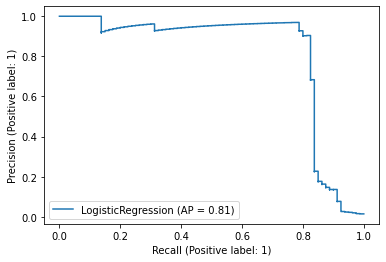

In [21]:
disp = plot_precision_recall_curve(model, X_test, y_test)


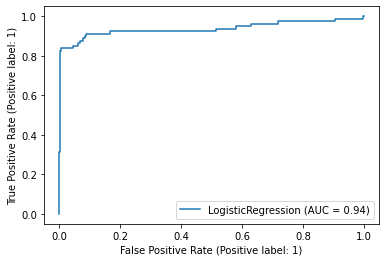

In [24]:
# when precision is 0.75, reall is approx 0.8
plot_roc_curve(model, X_test, y_test)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*